<a href="https://colab.research.google.com/github/prernaa7/cardiac-arrest-prediction-model/blob/main/Cardiac_Arrest_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Cardiac Arrest Using Machine Learning**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, ConfusionMatrixDisplay)

## **Load Data**

In [31]:
df = pd.read_csv('/content/drive/MyDrive/cardiac arrest dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## **Data Preparation**

### **Data Seperation as X and Y**

In [75]:
X = df.drop('target', axis=1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


### **Data splitting**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
198,60,0,2,102,318,0,1,160,0,0.0,2,1,2
918,59,1,3,134,204,0,1,162,0,0.8,2,2,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3
32,57,1,0,130,131,0,1,115,1,1.2,1,1,3
82,46,1,2,150,231,0,1,147,0,3.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3
905,64,1,0,120,246,0,0,96,1,2.2,0,1,2
961,58,0,0,100,248,0,0,122,0,1.0,1,0,2
465,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [36]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
472,58,0,0,130,197,0,1,131,0,0.6,1,0,2
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2
122,60,1,0,145,282,0,0,142,1,2.8,1,2,3
173,39,0,2,94,199,0,1,179,0,0.0,2,0,2
36,51,1,3,125,213,0,0,125,1,1.4,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,35,1,0,120,198,0,1,130,1,1.6,1,0,3
669,66,1,1,160,246,0,1,120,1,0.0,1,3,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
805,53,1,0,142,226,0,0,111,1,0.0,2,0,3


### **Model Building**

In [64]:
def get_scores(y_true, y_pred, y_proba):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        roc_auc_score(y_true, y_proba)
    ]

## **Logistic Regression**

In [65]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

y_lr_train_proba = lr.predict_proba(X_train)[:,1]
y_lr_test_proba = lr.predict_proba(X_test)[:,1]

## **Random Forest**

In [66]:
rf = RandomForestClassifier(max_depth=5, random_state=100)
rf.fit(X_train, y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

y_rf_train_proba = rf.predict_proba(X_train)[:,1]
y_rf_test_proba = rf.predict_proba(X_test)[:,1]

## **Training VS Testing Metrics**

In [67]:
train_test_results = pd.DataFrame([
    ['Logistic Regression (Train)'] + get_scores(y_train, y_lr_train_pred, y_lr_train_proba),
    ['Logistic Regression (Test)'] + get_scores(y_test, y_lr_test_pred, y_lr_test_proba),
    ['Random Forest (Train)'] + get_scores(y_train, y_rf_train_pred, y_rf_train_proba),
    ['Random Forest (Test)'] + get_scores(y_test, y_rf_test_pred, y_rf_test_proba)
], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

print("=== Training vs Testing Metrics ===")
print(train_test_results)

=== Training vs Testing Metrics ===
                         Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression (Train)  0.843902   0.817787  0.895487  0.854875   
1   Logistic Regression (Test)  0.819512   0.788136  0.885714  0.834081   
2        Random Forest (Train)  0.937805   0.916667  0.966746  0.941040   
3         Random Forest (Test)  0.926829   0.901786  0.961905  0.930876   

    ROC AUC  
0  0.928408  
1  0.906667  
2  0.991636  
3  0.987333  


## **Confusion Matrix**

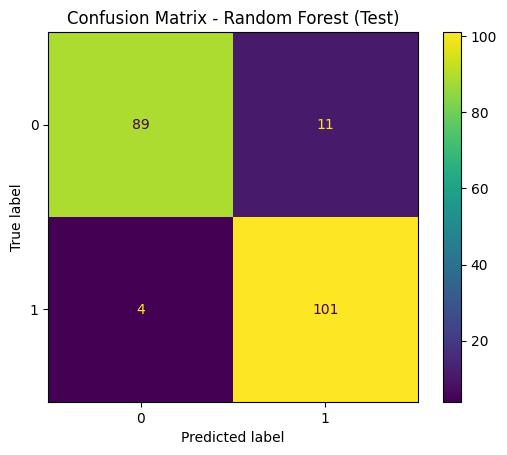

In [68]:
best_model_name = train_test_results.loc[train_test_results['Model'].str.contains('Test')].sort_values(
    'ROC AUC', ascending=False
).iloc[0]['Model']

best_model = rf if 'Random Forest' in best_model_name else lr

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


## **ROC Curve**

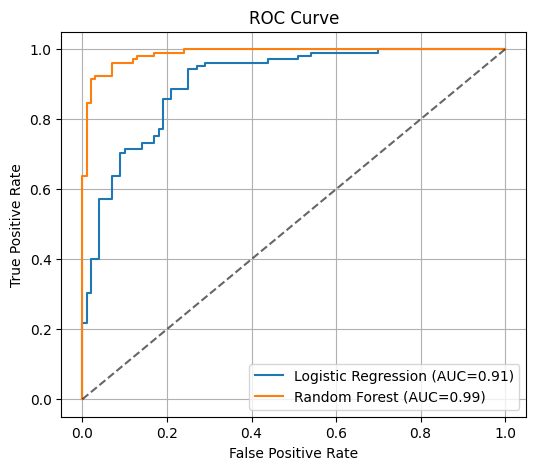

In [69]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_test_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_test_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_auc_score(y_test, y_lr_test_proba):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_test, y_rf_test_proba):.2f})')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## **Feature Importance**

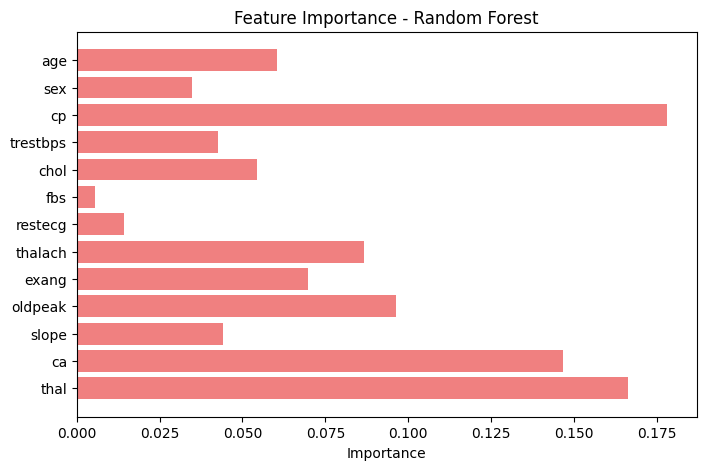

In [76]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feat_names, importances, color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


## **Train Vs Test**

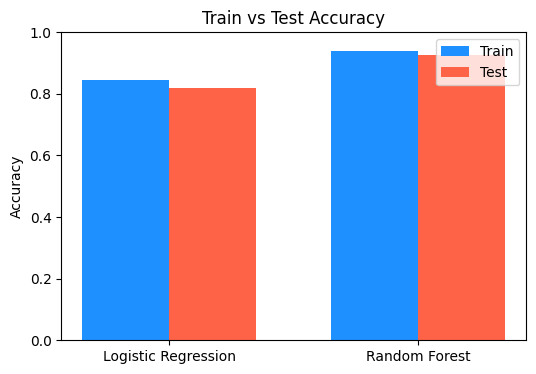

In [74]:
import matplotlib.pyplot as plt

# Prepare data
models = ['Logistic Regression', 'Random Forest']
train_scores = [train_test_results.loc[0, 'Accuracy'], train_test_results.loc[2, 'Accuracy']]
test_scores = [train_test_results.loc[1, 'Accuracy'], train_test_results.loc[3, 'Accuracy']]

x = np.arange(len(models))  # Model positions
width = 0.35

# Plot
plt.figure(figsize=(6,4))
plt.bar(x - width/2, train_scores, width, label='Train', color='dodgerblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='tomato')

plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()
